In [35]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [5]:
iris=load_iris()


In [6]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df['target']=iris.target

In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
x=df.drop(['target'],axis='columns')
y=df.target

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
len(xtrain)

120

In [12]:
len(xtest)

30

In [39]:
model=KNeighborsClassifier(n_neighbors=10)
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=10)

In [40]:
model.score(xtest,ytest)

0.9333333333333333

In [36]:
clf=GridSearchCV(model,{
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10]
},cv=5,return_train_score=False)
clf.fit(x,y)
clf.cv_results_

{'mean_fit_time': array([0.00061359, 0.00137496, 0.00099869, 0.00313058, 0.00312433,
        0.        , 0.        , 0.        , 0.00312424, 0.        ]),
 'std_fit_time': array([0.00080593, 0.00051193, 0.0008932 , 0.00626116, 0.00624866,
        0.        , 0.        , 0.        , 0.00624847, 0.        ]),
 'mean_score_time': array([0.00439034, 0.00296998, 0.00160966, 0.00312433, 0.        ,
        0.00312514, 0.00624843, 0.00312338, 0.00312433, 0.00312424]),
 'std_score_time': array([5.55135465e-03, 6.57527147e-05, 1.35704883e-03, 6.24866486e-03,
        0.00000000e+00, 6.25028610e-03, 7.65272830e-03, 6.24675751e-03,
        6.24866486e-03, 6.24847412e-03]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 

In [37]:
df=pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000614,0.000806,0.004390,0.005551,1,{'n_neighbors': 1},0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,9
1,0.001375,0.000512,0.002970,0.000066,2,{'n_neighbors': 2},0.966667,0.933333,0.933333,0.900000,1.0,0.946667,0.033993,10
2,0.000999,0.000893,0.001610,0.001357,3,{'n_neighbors': 3},0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,7
3,0.003131,0.006261,0.003124,0.006249,4,{'n_neighbors': 4},0.966667,0.966667,0.966667,0.966667,1.0,0.973333,0.013333,4
4,0.003124,0.006249,0.000000,0.000000,5,{'n_neighbors': 5},0.966667,1.000000,0.933333,0.966667,1.0,0.973333,0.024944,4
5,0.000000,0.000000,0.003125,0.006250,6,{'n_neighbors': 6},0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
6,0.000000,0.000000,0.006248,0.007653,7,{'n_neighbors': 7},0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
7,0.000000,0.000000,0.003123,0.006247,8,{'n_neighbors': 8},0.966667,1.000000,0.933333,0.933333,1.0,0.966667,0.029814,7
8,0.003124,0.006248,0.003124,0.006249,9,{'n_neighbors': 9},0.966667,1.000000,0.966667,0.933333,1.0,0.973333,0.024944,4
9,0.000000,0.000000,0.003124,0.006248,10,{'n_neighbors': 10},0.966667,1.000000,1.000000,0.933333,1.0,0.980000,0.026667,1


In [38]:
df[['param_n_neighbors','mean_test_score']]

,param_n_neighbors,mean_test_score
0,1,0.960000
1,2,0.946667
2,3,0.966667
3,4,0.973333
4,5,0.973333
5,6,0.980000
6,7,0.980000
7,8,0.966667
8,9,0.973333
9,10,0.980000


In [28]:
ypredict=model.predict(xtest)

In [29]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypredict)
cm

array([[13,  0,  0],
       [ 0,  6,  1],
       [ 0,  0, 10]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

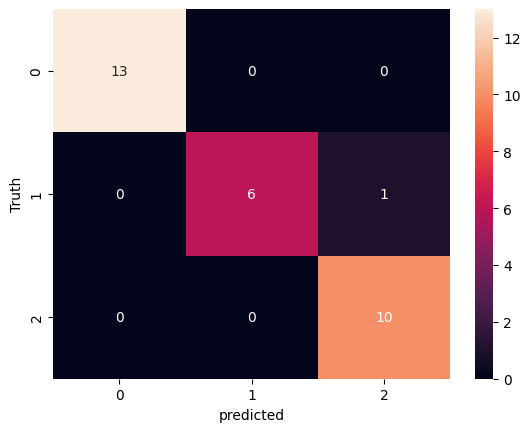

In [33]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")